In [1]:
#importing packages
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
#shape
print('This data frame has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

This data frame has 284807 rows and 31 columns.


In [4]:
#peek at data
df.sample(5)

Time        V1        V2        V3        V4        V5        V6  \
94882    65073.0 -1.016393 -0.364899  2.108495 -2.700089 -0.858269  0.019034   
103854   68822.0 -0.310685  1.146024  0.673147  1.017791 -0.362576 -0.821842   
73936    55352.0 -0.103085  0.652214  1.109885 -0.403719  0.482006 -0.065549   
29122    35330.0 -0.644765  0.590458  1.262996  0.849216  0.209868 -0.221918   
227710  145188.0 -0.312365 -0.078911 -0.354037 -2.126812 -0.242880 -0.972005   

              V7        V8        V9  ...         V21       V22       V23  \
94882   1.120500 -0.132075  0.992845  ...    0.271125  0.746945 -0.047943   
103854  0.410228  0.273003 -0.654062  ...    0.182358  0.390255 -0.000901   
73936   0.771258 -0.139951 -0.649322  ...    0.027401  0.277645 -0.204715   
29122   0.447747  0.169589 -0.557130  ...    0.248389  0.600186 -0.055084   
227710  0.239795  0.292052 -1.136249  ...    0.046200 -0.416618  0.240534   

             V24       V25       V26       V27       V28  Amount  Class  
94882   0.068584  0.636207 -0.054914 -0.181919 -0.158329  213.00      0  
103854  0.378285 -0.136017 -0.327143 -0.053600 -0.017405   31.24      0  
73936  -0.228709 -0.501985  1.117973 -0.109855 -0.119503    2.84      0  
29122   0.190560 -0.452372 -0.340837  0.037081  0.183460   35.92      0  
227710  0.657566 -0.011011 -0.568998 -0.225379 -0.151831   77.00      0  

[5 rows x 31 columns]

In [5]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [6]:
#numerical summary -> only non-anonymized columns of interest
pd.set_option('precision', 3)
df.loc[:, ['Time', 'Amount']].describe()

Time      Amount
count  284807.000  284807.000
mean    94813.860      88.350
std     47488.146     250.120
min         0.000       0.000
25%     54201.500       5.600
50%     84692.000      22.000
75%    139320.500      77.165
max    172792.000   25691.160

C:\Users\Darwoft\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


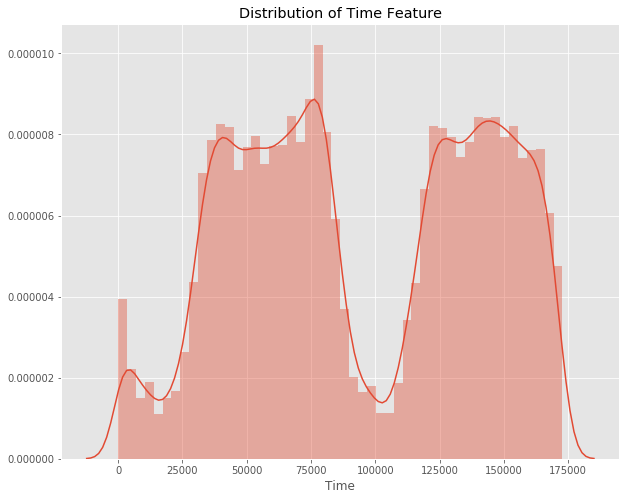

In [7]:
#visualizations of time and amount
plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(df.Time)

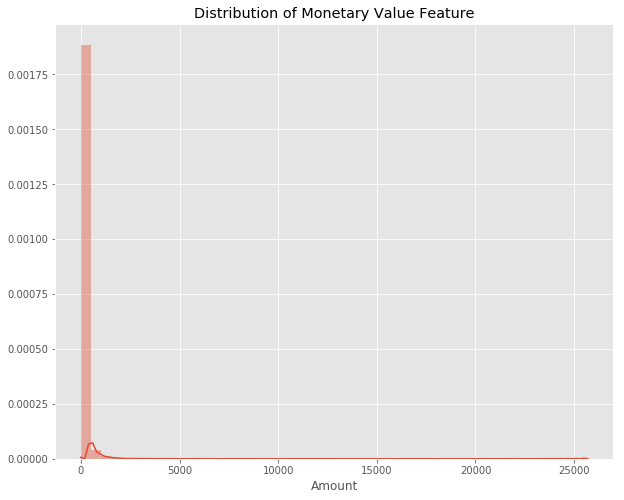

In [8]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Monetary Value Feature')
sns.distplot(df.Amount)

Around 88 dollars is the mean of all credit card transactions in this data set. The biggest transaction had a monetary value of around 25,691 dollars.

In [9]:
#fraud vs. normal transactions 
counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

There were 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%).


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

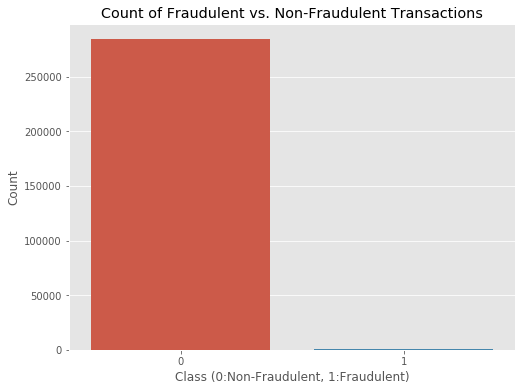

In [10]:
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [11]:
corr = df.corr()
corr

Time         V1         V2         V3         V4         V5  \
Time    1.000  1.174e-01 -1.059e-02 -4.196e-01 -1.053e-01  1.731e-01   
V1      0.117  1.000e+00  4.697e-17 -1.424e-15  1.755e-17  6.391e-17   
V2     -0.011  4.697e-17  1.000e+00  2.512e-16 -1.126e-16 -2.040e-16   
V3     -0.420 -1.424e-15  2.512e-16  1.000e+00 -3.417e-16 -1.437e-15   
V4     -0.105  1.755e-17 -1.126e-16 -3.417e-16  1.000e+00 -1.941e-15   
V5      0.173  6.391e-17 -2.040e-16 -1.437e-15 -1.941e-15  1.000e+00   
V6     -0.063  2.398e-16  5.025e-16  1.432e-15 -2.713e-16  7.926e-16   
V7      0.085  1.992e-15  3.966e-16  2.169e-15  1.556e-16 -4.210e-16   
V8     -0.037 -9.491e-17 -4.414e-17  3.433e-16  5.196e-16  7.589e-16   
V9     -0.009  2.170e-16 -5.729e-17 -4.234e-16  3.860e-16  4.205e-16   
V10     0.031  7.434e-17 -4.782e-16  6.289e-16  6.055e-16 -6.602e-16   
V11    -0.248  2.439e-16  9.469e-16 -5.502e-17 -2.084e-16  7.343e-16   
V12     0.124  2.422e-16 -6.588e-16  2.207e-16 -5.658e-16  3.761e-16   
V13    -0.066 -2.115e-16  3.855e-16 -6.883e-16 -1.506e-16 -9.579e-16   
V14    -0.099  9.353e-16 -2.541e-16  4.271e-16 -8.522e-17 -3.635e-16   
V15    -0.183 -3.252e-16  2.831e-16  1.123e-16 -1.508e-16 -5.133e-16   
V16     0.012  6.309e-16  4.934e-17  1.183e-15 -6.939e-16 -3.517e-16   
V17    -0.073 -5.012e-16 -9.883e-16  4.577e-17 -4.398e-16  1.426e-16   
V18     0.090  2.870e-16  2.637e-16  5.428e-16  1.494e-16  1.110e-15   
V19     0.029  1.818e-16  9.528e-17  2.577e-16 -2.657e-16 -3.138e-16   
V20    -0.051  1.037e-16 -9.310e-16 -9.429e-16 -3.223e-16  2.076e-16   
V21     0.045 -1.755e-16  8.444e-17 -2.972e-17 -9.977e-17 -1.369e-16   
V22     0.144  7.477e-17  2.501e-16  4.648e-16  2.100e-16  5.060e-16   
V23     0.051  9.809e-16  1.060e-16  2.115e-17  6.003e-17  1.638e-16   
V24    -0.016  7.354e-17 -8.142e-18 -9.352e-17  2.230e-16 -9.286e-16   
V25    -0.233 -9.805e-16 -4.262e-17  4.771e-16  5.395e-16  5.625e-16   
V26    -0.041 -8.622e-17  2.602e-16  6.522e-16 -6.180e-16  9.145e-16   
V27    -0.005  3.208e-17 -4.478e-16  6.240e-16 -6.403e-17  4.466e-16   
V28    -0.009  9.821e-16 -3.676e-16  7.727e-16 -5.864e-17 -3.299e-16   
Amount -0.011 -2.277e-01 -5.314e-01 -2.109e-01  9.873e-02 -3.864e-01   
Class  -0.012 -1.013e-01  9.129e-02 -1.930e-01  1.334e-01 -9.497e-02   

               V6         V7         V8         V9    ...            V21  \
Time   -6.302e-02  8.471e-02 -3.695e-02 -8.660e-03    ...      4.474e-02   
V1      2.398e-16  1.992e-15 -9.491e-17  2.170e-16    ...     -1.755e-16   
V2      5.025e-16  3.966e-16 -4.414e-17 -5.729e-17    ...      8.444e-17   
V3      1.432e-15  2.169e-15  3.433e-16 -4.234e-16    ...     -2.972e-17   
V4     -2.713e-16  1.556e-16  5.196e-16  3.860e-16    ...     -9.977e-17   
V5      7.926e-16 -4.210e-16  7.589e-16  4.205e-16    ...     -1.369e-16   
V6      1.000e+00  1.429e-16 -1.707e-16  1.114e-16    ...     -1.576e-16   
V7      1.429e-16  1.000e+00 -8.692e-17  7.933e-16    ...      1.939e-16   
V8     -1.707e-16 -8.692e-17  1.000e+00  2.901e-16    ...     -2.412e-16   
V9      1.114e-16  7.933e-16  2.901e-16  1.000e+00    ...      4.578e-17   
V10     2.851e-16  3.043e-17  9.052e-17 -2.772e-16    ...      8.090e-16   
V11     4.866e-16 -1.084e-15  1.955e-16  4.682e-16    ...     -3.912e-16   
V12     2.141e-16  1.510e-15 -6.266e-17 -2.445e-15    ...      3.230e-16   
V13    -2.268e-16 -9.892e-17 -2.383e-16 -2.650e-16    ...      9.499e-17   
V14     3.453e-16 -1.729e-16 -1.131e-16  2.343e-16    ...      1.634e-17   
V15    -6.368e-18  1.937e-17  2.021e-16 -1.588e-15    ...      1.947e-17   
V16    -2.478e-16  2.894e-16  5.027e-16 -3.252e-16    ...     -3.927e-16   
V17     3.568e-16  1.150e-15 -3.509e-16  6.536e-16    ...     -7.754e-16   
V18     2.811e-16 -1.117e-16 -4.094e-16  1.204e-16    ...     -1.141e-15   
V19     2.717e-16 -2.874e-16 -5.340e-16  1.121e-16    ...      4.033e-16   
V20     1.899e-16  1.744e-16 -1.096e-16 -4.341e-16    ...     -1.121e-15   
V21    -1.576e-16  1.939e-16 -2.

Text(0.5, 1.0, 'Heatmap of Correlation')

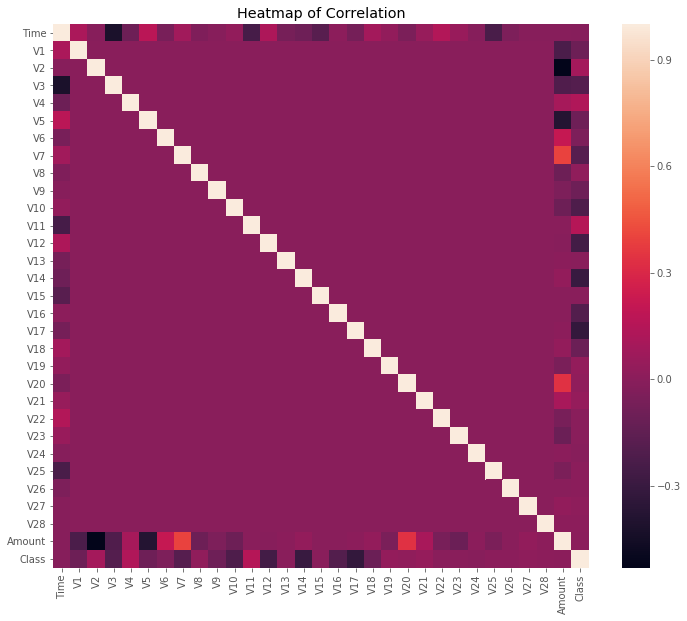

In [12]:
#heatmap
corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

In [13]:
#skewness
skew_ = df.skew()
skew_

Time      -0.036
V1        -3.281
V2        -4.625
V3        -2.240
V4         0.676
V5        -2.426
V6         1.827
V7         2.554
V8        -8.522
V9         0.555
V10        1.187
V11        0.357
V12       -2.278
V13        0.065
V14       -1.995
V15       -0.308
V16       -1.101
V17       -3.845
V18       -0.260
V19        0.109
V20       -2.037
V21        3.593
V22       -0.213
V23       -5.875
V24       -0.552
V25       -0.416
V26        0.577
V27       -1.170
V28       11.192
Amount    16.978
Class     23.998
dtype: float64

**Scaling Amount and Time**

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()
#scaling time
scaled_time = scaler.fit_transform(df[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list1)

In [15]:
#scaling the amount column
scaled_amount = scaler2.fit_transform(df[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

In [16]:
#concatenating newly created columns w original df
df = pd.concat([df, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
df.sample(5)

Time     V1     V2     V3     V4     V5     V6     V7     V8  \
229214  145841.0 -0.471  1.384  1.099  2.701  0.318  0.856 -0.100  0.778   
93532    64471.0 -1.167  1.642 -0.161  0.944  0.223 -0.219 -0.174  0.997   
14225    25274.0 -0.302  0.937  1.274  0.396  0.442  0.137  0.399  0.187   
82712    59517.0  1.198  0.266  0.400  0.631 -0.466 -0.879 -0.052 -0.036   
153128   97947.0  1.967  0.787 -1.511  3.736  1.111 -0.319  0.597 -0.230   

           V9     ...         V23    V24    V25    V26    V27    V28  Amount  \
229214 -1.525     ...       0.279  0.671 -0.778 -0.521 -0.215 -0.041    6.66   
93532  -1.085     ...      -0.161 -0.431 -0.326 -0.308 -0.159  0.007    1.00   
14225  -0.901     ...      -0.007 -0.342 -0.667  0.198  0.135  0.142    0.99   
82712  -0.152     ...       0.149  0.479  0.139  0.066 -0.031  0.021    1.98   
153128 -0.264     ...      -0.008 -0.512  0.287  0.116 -0.126 -0.091    6.00   

        Class  scaled_amount  scaled_time  
229214      0         -0.327        1.075  
93532       0         -0.349       -0.639  
14225       0         -0.349       -1.464  
82712       0         -0.345       -0.743  
153128      0         -0.329        0.066  

[5 rows x 33 columns]

In [17]:
#dropping old amount and time columns
df.drop(['Amount', 'Time'], axis=1, inplace=True)

**Splitting Data into Train and Test**

In [18]:
#manual train test split using numpy's random.rand
mask = np.random.rand(len(df)) < 0.9
train = df[mask]
test = df[~mask]
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))

Train Shape: (256259, 31)
Test Shape: (28548, 31)


In [19]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

**Creating a subsample data set with balanced class distributions**

In [20]:
#how many random samples from normal transactions do we need?
no_of_frauds = train.Class.value_counts()[1]
print('There are {} fraudulent transactions in the train data.'.format(no_of_frauds))

There are 443 fraudulent transactions in the train data.


In [21]:
#randomly selecting 442 random non-fraudulent transactions
non_fraud = train[train['Class'] == 0]
fraud = train[train['Class'] == 1]

In [22]:
selected = non_fraud.sample(no_of_frauds)
selected.head()

V1     V2     V3     V4     V5     V6     V7     V8     V9    V10  \
121467 -0.950  0.321  1.646 -1.857 -0.900 -0.131 -0.681  0.675 -0.955 -0.163   
158992  1.660 -1.219 -0.686  0.371 -0.190  1.641 -0.897  0.480 -0.451  0.941   
75000   1.135  0.124  0.109  0.903  0.039  0.005  0.007  0.113 -0.139  0.153   
227501  2.086  0.057 -2.032  0.203  0.685 -0.872  0.564 -0.329 -0.133  0.329   
197104  1.776 -1.392 -1.778 -1.052  0.154  0.724 -0.420  0.078 -0.571  0.638   

           ...         V22    V23    V24    V25    V26    V27    V28  Class  \
121467     ...       1.200 -0.249 -0.257  0.118 -0.128  0.236  0.091      0   
158992     ...      -0.810  0.336 -1.746 -0.706 -0.883  0.098 -0.022      0   
75000      ...       0.215 -0.134 -0.317  0.593 -0.296  0.016  0.006      0   
227501     ...       0.573 -0.004  0.851  0.367  0.657 -0.121 -0.088      0   
197104     ...       1.529 -0.062 -0.354 -0.052  0.129 -0.018 -0.040      0   

        scaled_amount  scaled_time  
121467         -0.309       -0.290  
158992          0.250        0.591  
75000          -0.241       -0.738  
227501         -0.350        1.287  
197104          0.387        0.984  

[5 rows x 31 columns]

In [23]:
#concatenating both into a subsample data set with equal class distribution
selected.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)

In [24]:
subsample = pd.concat([selected, fraud])
len(subsample)

886

In [25]:
#shuffling our data set
subsample = subsample.sample(frac=1).reset_index(drop=True)
subsample.head(10)

V1     V2      V3     V4     V5     V6     V7     V8     V9    V10  \
0  1.177  0.557  -0.491  0.756  0.249 -0.782  0.229 -0.041 -0.432 -0.586   
1  1.955  1.630  -4.337  2.378  2.113 -1.584  0.654 -0.193  1.218 -2.829   
2 -7.223  6.156 -10.826  4.181 -6.124 -3.114 -6.895  5.162 -2.516 -6.403   
3 -1.586  3.262  -4.137  2.357 -1.405 -1.879 -3.514  1.516 -1.207 -6.235   
4  1.140  1.156  -1.472  2.076  0.775 -1.003  0.265  0.013  0.249 -2.101   
5  1.106  0.181   0.409  0.739 -0.467 -1.264  0.437 -0.348 -0.271 -0.133   
6  1.940 -0.856  -1.351 -0.769  1.429  4.022 -1.522  1.136  1.220 -0.008   
7 -1.502  0.296  -3.673 -0.665 -7.692  4.259  8.918 -1.421 -0.268 -1.764   
8 -1.519  2.308  -1.504  2.064 -1.001 -1.017 -2.060 -0.275 -1.562 -2.756   
9  1.030 -0.248   2.245  3.085 -1.449  0.955 -1.264  0.478  1.233  0.251   

      ...         V22    V23    V24    V25    V26    V27    V28  Class  \
0     ...      -0.128 -0.040  0.110  0.438  0.369 -0.018  0.031      1   
1     ...      -0.975 -0.048 -0.024  0.362 -0.571  0.026  0.082      1   
2     ...      -0.630  0.191 -0.061  0.380 -0.267  1.194  0.257      1   
3     ...      -0.547 -0.077 -0.426  0.124  0.322  0.264  0.133      1   
4     ...      -0.867 -0.122 -0.356  0.635 -0.306  0.094  0.121      1   
5     ...      -1.392  0.225  0.698  0.064 -0.158 -0.049  0.036      0   
6     ...       0.129  0.350  0.731 -0.563  0.501  0.006 -0.042      0   
7     ...      -0.124  0.198  0.821  0.228 -0.089  1.079 -0.742      0   
8     ...       0.103 -0.018  0.150 -0.097 -0.369 -0.019 -0.208      1   
9     ...       0.621 -0.115  0.428  0.451  0.251  0.090  0.040      0   

   scaled_amount  scaled_time  
0         -0.350       -0.995  
1         -0.349       -0.069  
2          0.047       -1.117  
3         -0.349       -1.830  
4         -0.349       -0.378  
5         -0.052       -0.315  
6         -0.275        0.732  
7          6.791        1.155  
8         -0.349       -1.038  
9         -0.308       -1.122  

[10 rows x 31 columns]

Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

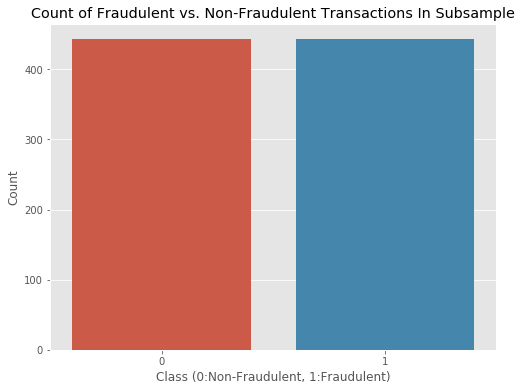

In [26]:
new_counts = subsample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [27]:
#taking a look at correlations once more
corr = subsample.corr()
corr = corr[['Class']]
corr

Class
V1            -0.447
V2             0.489
V3            -0.561
V4             0.711
V5            -0.372
V6            -0.416
V7            -0.469
V8             0.067
V9            -0.547
V10           -0.626
V11            0.679
V12           -0.679
V13           -0.085
V14           -0.742
V15           -0.034
V16           -0.597
V17           -0.564
V18           -0.478
V19            0.287
V20            0.188
V21            0.111
V22            0.034
V23           -0.034
V24           -0.063
V25            0.027
V26            0.060
V27            0.077
V28            0.065
Class          1.000
scaled_amount  0.064
scaled_time   -0.164

In [28]:
#negative correlations smaller than -0.5
corr[corr.Class < -0.5]

Class
V3  -0.561
V9  -0.547
V10 -0.626
V12 -0.679
V14 -0.742
V16 -0.597
V17 -0.564

In [29]:
#positive correlations greater than 0.5
corr[corr.Class > 0.5]

Class
V4     0.711
V11    0.679
Class  1.000

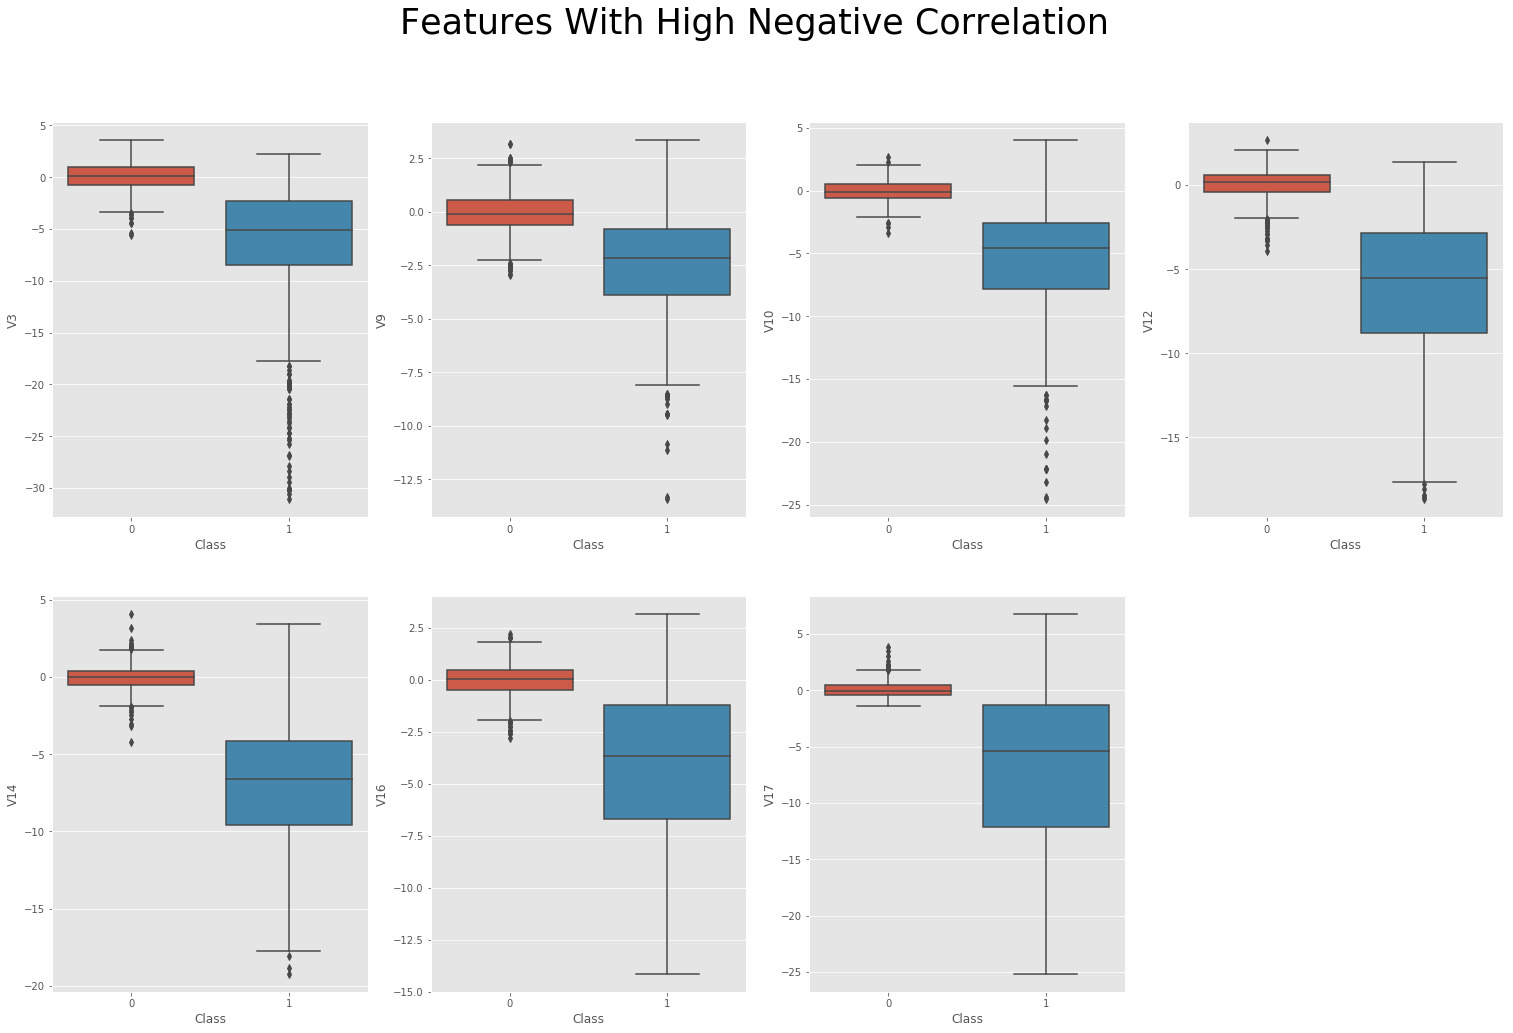

In [30]:
#visualizing the features w high negative correlation
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(26,16))

f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Class", y="V3", data=subsample, ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=subsample, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=subsample, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=subsample, ax=axes[0,3])
sns.boxplot(x="Class", y="V14", data=subsample, ax=axes[1,0])
sns.boxplot(x="Class", y="V16", data=subsample, ax=axes[1,1])
sns.boxplot(x="Class", y="V17", data=subsample, ax=axes[1,2])
f.delaxes(axes[1,3])

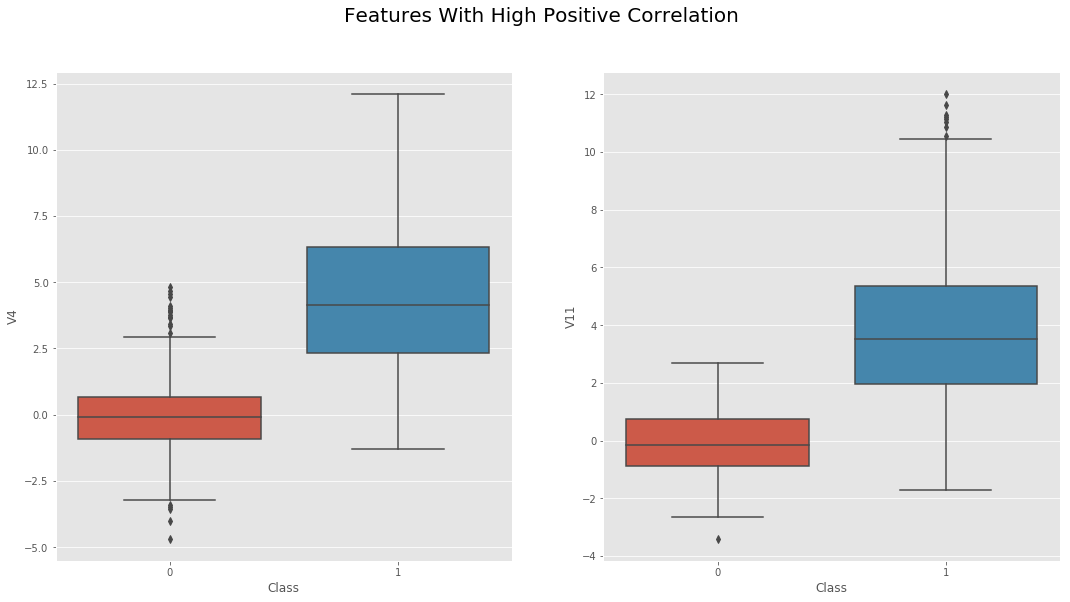

In [31]:
#visualizing the features w high positive correlation
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,9))

f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V4", data=subsample, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=subsample, ax=axes[1])

**Extreme Outlier Removal**

In [32]:
#Only removing extreme outliers
Q1 = subsample.quantile(0.25)
Q3 = subsample.quantile(0.75)
IQR = Q3 - Q1

df2 = subsample[~((subsample < (Q1 - 2.5 * IQR)) |(subsample > (Q3 + 2.5 * IQR))).any(axis=1)]

In [33]:
len_after = len(df2)
len_before = len(subsample)
len_difference = len(subsample) - len(df2)
print('We reduced our data size from {} transactions by {} transactions to {} transactions.'.format(len_before, len_difference, len_after))

We reduced our data size from 886 transactions by 245 transactions to 641 transactions.


**Dimensionality Reduction**

In [34]:
from sklearn.manifold import TSNE

X = df2.drop('Class', axis=1)
y = df2['Class']

In [35]:
#t-SNE
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

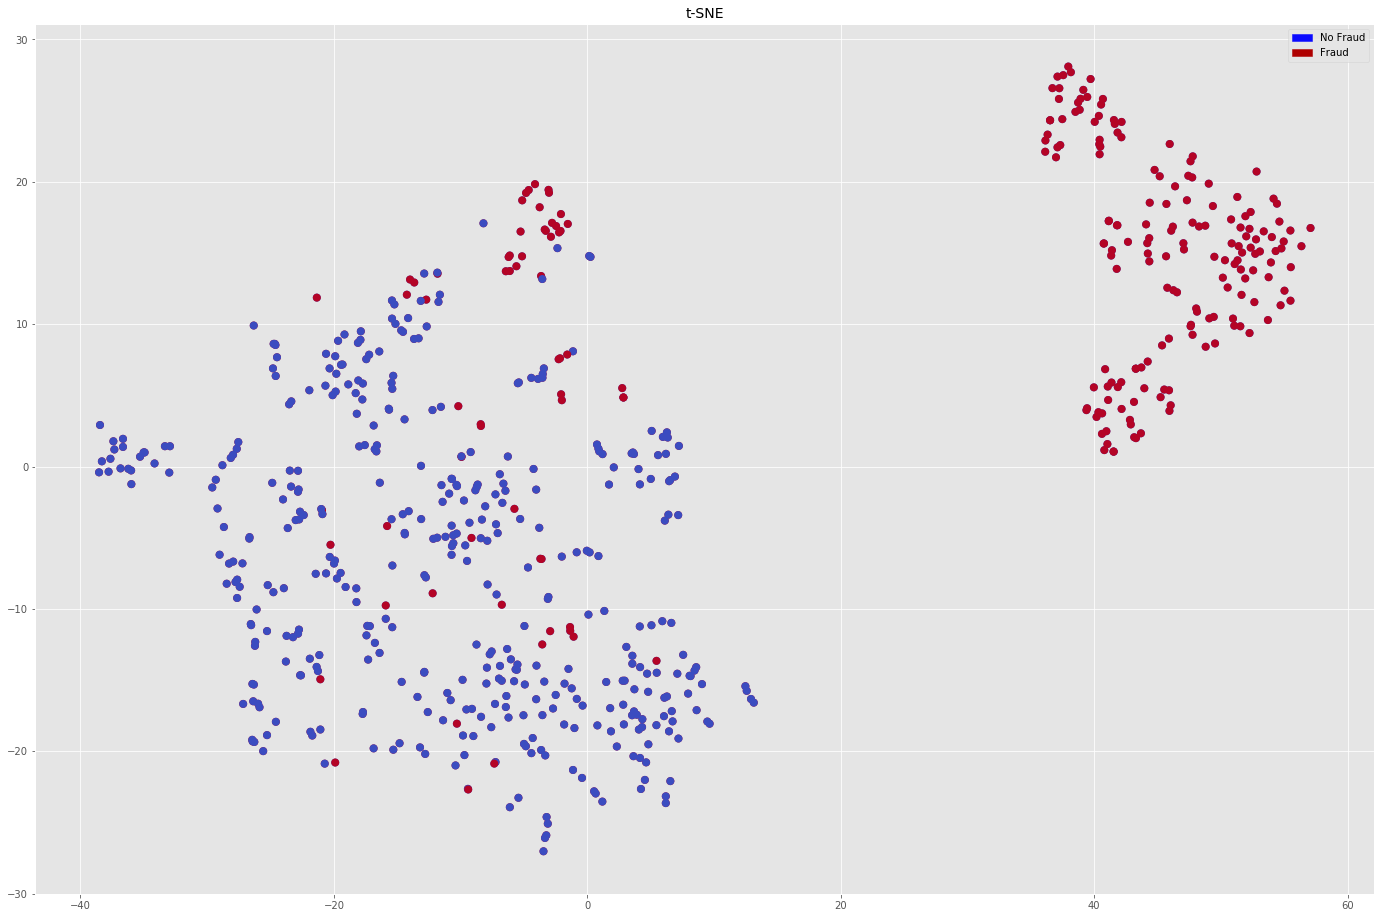

In [36]:
# t-SNE scatter plot
import matplotlib.patches as mpatches

f, ax = plt.subplots(figsize=(24,16))


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])


**Classification Algorithms**

In [37]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [38]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
X_train = X_train.values
X_validation = X_test.values
y_train = y_train.values
y_validation = y_test.values

In [40]:
print('X_shapes:\n', 'X_train:', 'X_validation:\n', X_train.shape, X_validation.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_validation:\n', y_train.shape, y_validation.shape)

X_shapes:
 X_train: X_validation:
 (512, 30) (129, 30) 

Y_shapes:
 Y_train: Y_validation:
 (512,) (129,)


In [41]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier


In [42]:
##Spot-Checking Algorithms

models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))
models.append(('RF', RandomForestClassifier()))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.958874 (0.054309)
LDA: 0.958507 (0.044738)
KNN: 0.950825 (0.042370)
CART: 0.873816 (0.060985)
SVM: 0.955451 (0.043091)
XGB: 0.962436 (0.040660)
RF: 0.945846 (0.043223)


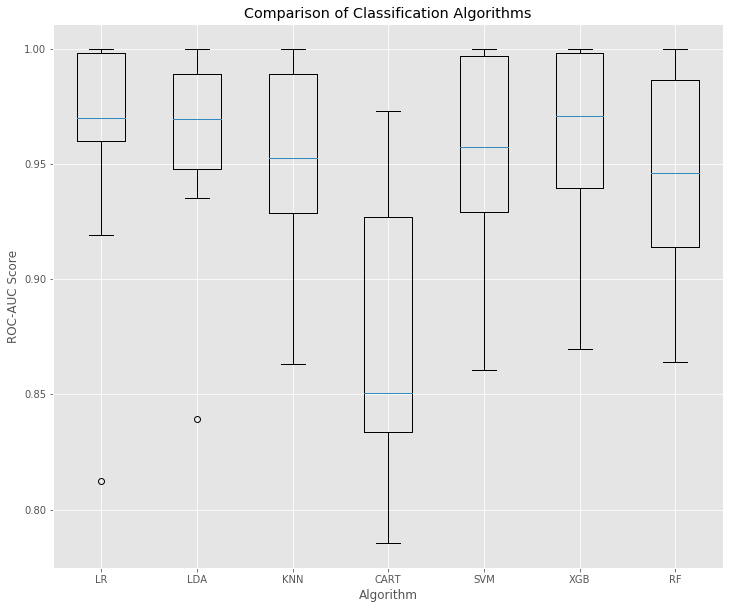

In [43]:
#Compare Algorithms

fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

In [44]:
#visualizing RF
model = RandomForestClassifier(n_estimators=10)

# Train
model.fit(X_train, y_train)
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X.columns.tolist(),
                class_names = ['0',' 1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')